# **_Welcome to Nyquist's Visualizing Data project for INFO 1201_**
#### - Most of the code was remixed or reused from Shiva Darian's lectures and slides
#### - The tables comparing three values were remixed from Michael Ghattas' code
#### - Code to explode out labels was remixed from Zain's work
#### My previous project, Exploring Data, had answered 3 questions.
#### In this project, I expanded to create 4 questions that I could answer through creating visualizing the data.
#### A lot of the code I created has some bugs, but they are visuals to look at nonetheless.

## **To Navigate to my Visualizing Data project code:**
#### - Skip past my Exploring Data project code
#### - The code after the thank you are practices from class - feel free to disregard them
#### **_- At the end of the practice code, you will see a header that introduces my work for this project!_**

In [1]:
# I imported pandas and numpy, two libraries used in python that have functions to simplify data analysis
import pandas as pd
import numpy as np

In [2]:
# The variable superheroes means that python will use a pandas function to read the excel data sheet, organizing by the numbers in FIRST_YEAR column
superheroes = pd.read_csv("superhero_viz_data.csv", parse_dates = ["FIRST_YEAR"])

In [3]:
# This is a viewing of the excel sheet to make sure everything is working
superheroes.head()

,UNIVERSE,page_id,name,urlslug,ID,ALIGN,IS_AVENGER,AVENGER_STATUS,AVENGER_YEAR,EYES,HAIR,SEX,SEXUALITY,ALIVE,APPEARANCES,FIRST_MONTH,FIRST_YEAR,DECEASED,RESURRECTED
0,DC,1702,Richard Occult (New Earth),Richard_Occult_(New_Earth),Secret Identity,ND,NO,ND,ND,Grey Eyes,Black Hair,Male Characters,Heterosexual Characters,Living Characters,125,October,1935,ND,ND
1,DC,158200,Arthur Pendragon (New Earth),Arthur_Pendragon_(New_Earth),Public Identity,Good Characters,NO,ND,ND,Brown Eyes,Brown Hair,Male Characters,Heterosexual Characters,Living Characters,41,February,1936,ND,ND
2,DC,289378,Bedivere (New Earth),Bedivere_(New_Earth),ND,ND,NO,ND,ND,ND,ND,Male Characters,Heterosexual Characters,Living Characters,ND,February,1936,ND,ND
3,DC,11333,Franklin Delano Roosevelt (New Earth),Franklin_Delano_Roosevelt_(New_Earth),Public Identity,Good Characters,NO,ND,ND,ND,Grey Hair,Male Characters,Heterosexual Characters,Living Characters,52,March,1936,ND,ND
4,DC,342641,Gareth (New Earth),Gareth_(New_Earth),ND,ND,NO,ND,ND,ND,ND,Male Characters,Heterosexual Characters,Living Characters,1,February,1936,ND,ND


In [4]:
print("After looking through the data of Marvel and DC characters, I developed some questions I wanted to answer.\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\nBelow is some general information for each of the keys I used:")

After looking through the data of Marvel and DC characters, I developed some questions I wanted to answer.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Below is some general information for each of the keys I used:


In [5]:
# The length of the columns or the number of rows are calculated and turned into a string to read
print("Total number of characters: " + str(len(superheroes)))

Total number of characters: 23420


In [6]:
# the variable is a list of counts for each value in a key
print("Total number of characters per gender:")
sex_counts = superheroes["SEX"].value_counts()
print(sex_counts)

Total number of characters per gender:
Male Characters           16521
Female Characters          5853
ND                          978
Agender Characters           45
Genderless Characters        20
Genderfluid Characters        2
Transgender Characters        1
Name: SEX, dtype: int64


In [7]:
print("Total number of characters per sexuality:")
sexuality_counts = superheroes["SEXUALITY"].value_counts()
print(sexuality_counts)

Total number of characters per sexuality:
Heterosexual Characters    23118
ND                           150
Homosexual Characters        118
Bisexual Characters           29
Transgender Characters         2
Pansexual Characters           1
Genderfluid Characters         1
Transvestites                  1
Name: SEXUALITY, dtype: int64


In [8]:
print("Total number of characters per moral alignment:")
moral_counts = superheroes["ALIGN"].value_counts()
print(moral_counts)

Total number of characters per moral alignment:
Bad Characters        9616
Good Characters       7584
ND                    3437
Neutral Characters    2779
Reformed Criminals       3
Name: ALIGN, dtype: int64


In [9]:
print("Total number of characters per eye color:")
eye_counts = superheroes["EYES"].value_counts()
print(eye_counts)

Total number of characters per eye color:
ND                                          13394
Blue Eyes                                    3127
Brown Eyes                                   2848
Black Eyes                                    972
Green Eyes                                    917
Red Eyes                                      719
White Eyes                                    517
Yellow Eyes                                   343
Grey Eyes                                     138
Hazel Eyes                                    102
Variable Eyes                                  49
Photocellular Eyes                             48
Purple Eyes                                    46
Orange Eyes                                    35
Pink Eyes                                      28
Gold Eyes                                      24
Violet Eyes                                    23
One Eye                                        21
Amber Eyes                                     15
Silver E

In [10]:
print("Total number of characters per identity:")
id_counts = superheroes["ID"].value_counts()
print(id_counts)
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\nNow, let's answer some questions!")

Total number of characters per identity:
Secret Identity                  8766
Public Identity                  7037
ND                               5784
No Dual Identity                 1802
Known to Authorities Identity      21
Identity Unknown                    9
Nathaniel Richards                  1
Name: ID, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Now, let's answer some questions!


In [11]:
print("First question:\nWhat percentage of female characters with a bad alignment have secret identities?\n")
# a crosstab compares the frequency of two or more values (whether they are present or not), even if they are from different keys
# big thanks to Ghattas for showcasing his work and showing how three variables can be compared in a crosstab
secretbadfemale= pd.crosstab(index = superheroes["SEX"] == ("Female Characters"), columns = [superheroes["ALIGN"] == ("Bad Characters"), superheroes["ID"] == ("Secret Identity")])
#I couldn't get the code below to work so that the table would be easier to read
#secretbadfemale.index = ["Not", "Women"]
#secretbadfemale.columns = (["Not", "Bad"], ["Not", "Secret"])
print(secretbadfemale)

print("\n712+861 = 1573\n(861/1573)*100 ~ 54.74 percent of female characters with a bad alignment have secret identities")

First question:
What percentage of female characters with a bad alignment have secret identities?

ALIGN False       True       
ID    False True  False True 
SEX                          
False  6545  2979  4414  3629
True   2983  1297   712   861

712+861 = 1573
(861/1573)*100 ~ 54.74 percent of female characters with a bad alignment have secret identities


In [12]:
print("Next question:\nWhat percentage of neutral characters have black or brown eyes?\n")
neutralblackbrown = pd.crosstab(index = superheroes["ALIGN"] == ("Neutral Characters"), columns = [superheroes["EYES"] == ("Black Eyes"), superheroes["EYES"] == ("Brown Eyes")])
print(neutralblackbrown)

print("\n149+379 = 528\n(528/2779)*100 ~ 19.00 percent of neutral characters have black or brown eyes")

Next question:
What percentage of neutral characters have black or brown eyes?

EYES   False       True 
EYES   False True  False
ALIGN                   
False  17349  2469   823
True    2251   379   149

149+379 = 528
(528/2779)*100 ~ 19.00 percent of neutral characters have black or brown eyes


In [13]:
print("Final question:\nWhat percentage of homosexual characters are male?\n")
# by using index and columns, the true/false labels can be redefined to make reading the crosstab easier
homosexualmale = pd.crosstab(index = superheroes["SEX"] == ("Male Characters"), columns = superheroes["SEXUALITY"] == ("Homosexual Characters"))
homosexualmale.columns = ["Not Homosexual", "Homosexual"]
homosexualmale.index = ["Not Male", "Male"]
print(homosexualmale)

print("\n(72/118)*100 ~ 61.02 percent of homosexual characters are male\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\nThank you for reading!")

Final question:
What percentage of homosexual characters are male?

          Not Homosexual  Homosexual
Not Male            6853          46
Male               16449          72

(72/118)*100 ~ 61.02 percent of homosexual characters are male
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Thank you for reading!


### The code below was done in class and is being kept for future reference, please disregard it for grading :)
#### Skip past it to get to the Visualizing Data Project

In [14]:
good_bad = pd.crosstab(superheroes["FIRST_YEAR"], superheroes["ALIGN"])
#print(good_bad)

In [15]:
bad_hair = pd.crosstab(superheroes["ALIGN"], superheroes["HAIR"])
#print(bad_hair)

In [16]:
creepy_villain = pd.crosstab(superheroes["EYES"] == "Violet Eyes", superheroes["HAIR"] == "Red Hair")
#print(creepy_villain)

In [17]:
#this doesn't work
creepy_villain2 = pd.crosstab(superheroes["EYES"] == ("Red Eyes" or "Blue Eyes"), superheroes["SEX"] == "Male Characters")
#print(creepy_villain2)

In [18]:
creepy_villain3 = pd.crosstab(superheroes["EYES"] == ("Red Eyes"), superheroes["SEX"] == "Male Characters")
#print(creepy_villain3)

In [19]:
#dataframe builds a functional table from the csv (using lists). we use data to perform operations
df = pd.DataFrame(data = superheroes)
#print(df)

In [20]:
#listing names of female characters that appear more than 100 times
#initialize a blank list

list_name = []

#.shape[0] gives number of rows, .shape[1] gives number of columns
num_rows = df.shape[0]

#to print out row 0 of appearances column
#print(df["APPEARANCES"] [0])

for row in range(num_rows):
    if(df["APPEARANCES"][row]=="ND"):
        continue
    elif (df["SEX"][row] == "Female Characters" and int(df["APPEARANCES"][row])) > 100:
        list_name.append(df["name"][row])
        
#print(list_name)
#build dictionary that takes universe that character is from (key), and the number of appearances
#dictionary_name = {}
#for item in list_name:

In [21]:
import csv

In [22]:
#when shiva uploads it, she'll put in the different modes with description
file = open("superhero_viz_data.csv", "r")
reader = csv.reader(file)
list = []

#make a list of all female characters appearing more than 100 times
#use a regular for loop (not range)

for row in reader:
    #print(row)
    #break
    if(row[14] == "ND"):
        continue
    elif((row[11]=="Female Characters") and int(row[14])>100):
        list.append(row[2])
        
#print (list)

In [23]:
# build a dictionary to take universe that character is from (key), and the number of appearances
dictionary_name = {}

for item in list:
    #if there is no parentheses, then skip it
    if("(" not in item):
        continue
    #when splitting, get 2 parts of the split: 0 (left) 1 (right)
    universe_name = item.split("(")[1][:-1]
    
    #if universe is already in dictionary, add 1 to the tally for the universe
    if universe_name in dictionary_name:
        dictionary_name[universe_name] += 1
        
    #if universe name isn't in dictionary yet, we want to add it (put first tally down)
    #syntax for adding to a dictionary is dictionary[key] = value
    else: 
        dictionary_name[universe_name] = 1
        
#print(dictionary_name)

In [24]:
#import the libraries
import matplotlib.pyplot as plt

#this will display graphs in line
%matplotlib inline
#specifying how large to show the figures
plt.rcParams["figure.figsize"]=(8,6)

In [25]:
#count all unique values
gen_counts = superheroes["SEX"].value_counts()
#print(gen_counts)

In [26]:
#here it is as a bar chart

#gen_counts.plot(kind = "bar", fontsize = 14)
#plt.title("Number of DC and Marvel Characters by Gender", fontsize = 18)
#plt.show()

#here it is as a pie chart

#gen_counts.plot(kind = "pie", autopct = "%1.0f%%", subplots = True, fontsize = 18)
#plt.title("Pie Chart of Number of DC and Marvel Characters by Gender", fontsize = 18)
#plt.show()

In [27]:
#combined_superheroes = superheroes
#combined_superheroes = combined_superheroes.replace("Male Characters", "MALE")
#sex_counts = combined_superheroes["SEX"].value_counts()
#print(sex_counts)

In [28]:
#dropping data 
#drop all of the SEX categories other than Male, Female, and ND
#create a series of variables that will hold the rest of the file without dropped values

#genderA = superheroes.drop(superheroes[superheroes.SEX == "Agender Characters"].index)
#genderGL = genderA.drop(genderA[genderA.SEX == "Genderless Characters"].index)
#genderGF = genderGL.drop(genderGL[genderGL.SEX == "Genderfluid Characters"].index)
#genderT = genderGF.drop(genderGF[genderGF.SEX == "Transgender Characters"].index)
#genderMF = genderT

#or gender A = superheroes[(superheroes["SEX"] == "Agender Characters") | (superheroes["SEX"] == "Genderless Characters")]
#genderA = genderA

#counts = genderMF["SEX"].value_counts()
#counts.plot(kind = "pie", colormap = "summer", autopct = "%1.0f%%", fontsize = 14)
#plt.title("Ammended or Limited Characters by Sex", fontsize = 18)

#make plot have even azes so the pie chart is perfectly circular
#plt.axis ("equal")
#plt.show()

#get rid of y axis label SEX
#plt.axes().set_ylabel('')
                      
# for custom colors
#my_colors = ["lavendar", "cyan", "orange"]

In [29]:
#appearance_by_sex = pd.crosstab(superheroes['FIRST_YEAR'], superheroes['SEX'])

#appearance_by_sex.plot()
#plt.title("Number of New Characters by Year per Gender")
#plt.xlabel("Years", fontsize = 14)
#plt.ylabel("Number of Characters", fontsize = 14)
#plt.show()

## Visualizing Data: Expansion of Previous Questions

In [30]:
print("This is a continuation from the previous project I worked on above.\nIt focuses on expanding my earlier questions,\nas well as showcasing the data for anyone to interpret and draw their own conclusions.\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")

This is a continuation from the previous project I worked on above.
It focuses on expanding my earlier questions,
as well as showcasing the data for anyone to interpret and draw their own conclusions.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



#### Question 1 Original: What percentage of female characters with a bad alignment have secret identities?
#### **_Expansion: How does the percentage of secret identities (y) differ between bad aligned characters of different genders (x)?_**
##### A bar graph is used so that the percentages of secret identities from each gender of bad characters can be better compared, disregarding the number of characters of each gender.
##### I attempted to drop anything not having a bad alignment or secret identity, but it doesn't seem that any of the drops worked.
##### I then created a crosstab between sex and identity, calculating the percentage of each before creating a bar plot from that crosstab.
##### There is something very wrong with this graph, as on top of it not just comparing secret identities, all the identities do not add up to 1. 

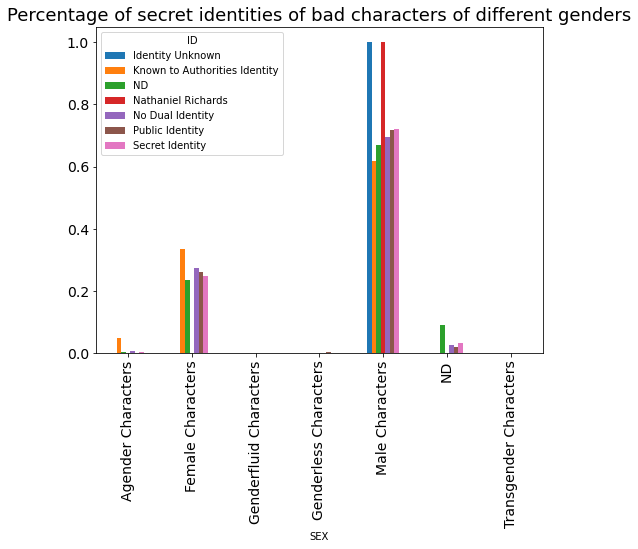

In [31]:
#I wanted to see how the percentages of this would compare with the percentages on the graph - surprisingly, they are similar if not the same
#However, both take percentages from the whole number of each sex rather than only bad-aligned characters of each sex
#Because of this, adding up the percentages of each identity of a sex does not equal 100%.
secretbad = pd.crosstab(index = superheroes["SEX"], columns = [superheroes["ALIGN"] == ("Bad Characters"), superheroes["ID"] == ("Secret Identity")]).apply(lambda r: r/r.sum())
#print(secretbad)

#i should drop any characters that are not bad or secret - didn't work
secretA = superheroes.drop(superheroes[superheroes.ID == "Public Identity"].index)
secretB = secretA.drop(secretA[secretA.ID == "ND"].index)
secretC = secretB.drop(secretB[secretB.ID == "No Dual Identity"].index)
secretD = secretC.drop(secretC[secretC.ID == "Known to Authorities Identity"].index)
secretE = secretD.drop(secretD[secretD.ID == "Identity Unknown"].index)
secretF = secretE.drop(secretE[secretE.ID == "Nathaniel Richards"].index)
secretG = secretF.drop(secretF[secretF.ALIGN == "Good Characters"].index)
secretH = secretG.drop(secretG[secretG.ALIGN == "ND"].index)
secretI = secretH.drop(secretH[secretH.ALIGN == "Neutral Characters"].index)
secretJ = secretI.drop(secretI[secretI.ALIGN == "Reformed Criminals"].index)
secretK = secretJ
#print(secretK)

secretK = pd.crosstab(superheroes["SEX"], superheroes["ID"]).apply(lambda r: r/r.sum())
#secretK = superheroes["SEX"].value_counts()
#secretK = superheroes["SEX"].value_counts().apply(lambda r: r/r.sum())
#secretK= pd.crosstab(index = superheroes["SEX"], columns = superheroes["ID"] == ("Secret Identity")).apply(lambda r: r/r.sum()
#secretK= pd.crosstab(index = superheroes["SEX"], columns = superheroes["ID"]).apply(lambda r: r/r.sum()
secretK.plot(kind = "bar", fontsize = 14)
plt.title("Percentage of secret identities of bad characters of different genders", fontsize = 18)
plt.show()

#### Question 2 Original: What percentage of neutral characters have black or brown eyes?
#### **_Expansion: How does the percentage of black or brown eyes (y) differ between differently aligned characters (x)?_**
##### A bar graph is used to compare the percentages of black or brown eyed characters in different alignments.
##### After (unsuccessfully) dropping alignment ND, I created a bar graph that visualizes a crosstab of alignment and occurence of black or brown eyes.
##### Once again, the percentages aren't adding up correctly to 100%, both in the crosstab and in the bar graph. 
##### Although the question cannot correctly be answered, black and brown eyes do appear to occur more often than any other eye color.

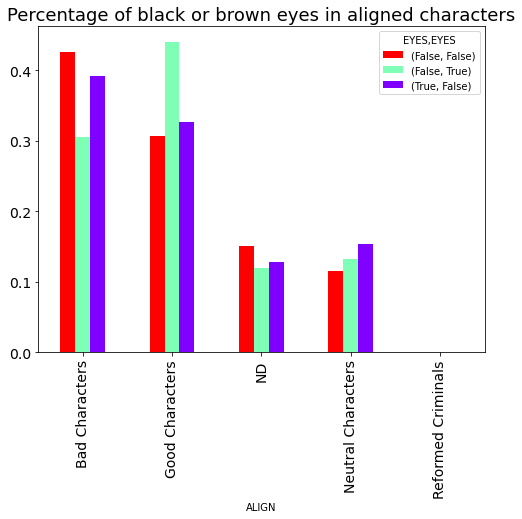

In [42]:
#I printed this to check if it was working properly - ND wasn't being dropped
#The percentages of each are not adding up to 1 again. 
neutralbb = superheroes.drop(superheroes[superheroes.ALIGN == "ND"].index)
neutralbb = pd.crosstab(index = superheroes["ALIGN"], columns = [superheroes["EYES"] == ("Black Eyes"), superheroes["EYES"] == ("Brown Eyes")]).apply(lambda r: r/r.sum())
#print(neutralbb)

neutralbb.plot(kind = "bar", colormap = "rainbow_r", fontsize = 14)
plt.title("Percentage of black or brown eyes in aligned characters", fontsize = 18)
plt.show()

#### Question 2 Original: What percentage of neutral characters have black or brown eyes?
#### **_Expansion: How does the number of introduced characters (y) per year (x) differ between characters of different eye color?_**
##### A line graph is used for its indication of time, and shows the number of times a new character (and their eye color) is introduced per year.
##### An (unsuccessful) attempted to drop ND was made before a crosstab between first year and eyes was made to compare the two.
##### A simple plot was created, with years as the x axis and y axis as the number of characters. A key distinguishes each eye color.
##### One can see that blue and brown eyes are the most frequent eye colors to be used, while others are used less often.

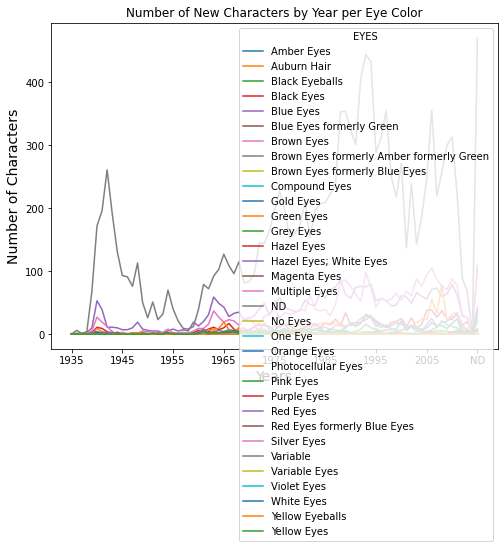

In [33]:
#I attempted to drop ND - it didn't work
dropND = superheroes.drop(superheroes[superheroes.EYES == "ND"].index)
eyefirstappearance = dropND
eyefirstappearance = pd.crosstab(superheroes['FIRST_YEAR'], superheroes['EYES'])

eyefirstappearance.plot()
plt.title("Number of New Characters by Year per Eye Color")
plt.xlabel("Years", fontsize = 14)
plt.ylabel("Number of Characters", fontsize = 14)
plt.show()

#### Question 3 Original: What percentage of homosexual characters are male?
#### **_Expansion: How do the percentages of each gender (y) differ between nonheterosexual characters (x)?_**
##### I decided to use a pie chart to compare this one, as the x value is either/or instead of categorized.
##### I dropped any heterosexual characters from the data (worked this time) and counted the sex of each character.
##### I didn't have to drop ND because no non heterosexual characters had ND - interesting
##### As one can see, the majority of nonheterosexual characters are male, with female characters a close second.
##### Genderfluid and genderless characters are barely shown in the pie chart.

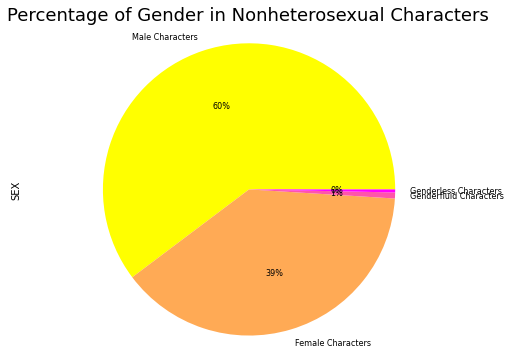

<ipython-input-34-0ce815aafbea>:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_xlabel('')


Text(0.5, 0, '')

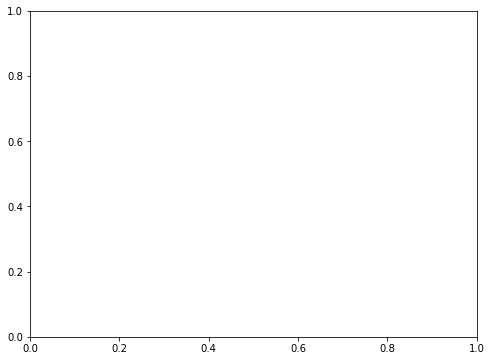

In [34]:
#This was used to check whether the percentages on the pie chart were appearing correctly
#homosexualG = pd.crosstab(index = superheroes["SEX"], columns = superheroes["SEXUALITY"] != ("Heterosexual Characters")).apply(lambda r: r/r.sum())
#print(homosexualG)

homosexualGG = superheroes.drop(superheroes[superheroes.SEXUALITY == "Heterosexual Characters"].index)
counts = homosexualGG["SEX"].value_counts()
#print(counts)

counts.plot(kind = "pie", colormap = "spring_r", autopct = "%1.0f%%", fontsize = 8)
plt.title("Percentage of Gender in Nonheterosexual Characters", fontsize = 18)

#Zain had a way of exploding out the data to be read better, but my data came with errors when I attempted to do this
#zains = plt.pie(whatYourePlotting, labels=yourLabels, explode=(0.1, 2, 1), autopct='%1.0f%%')
#mine = plt.pie(homosexualGG, explode=(0.1, 2, 1), autopct='%1.0f%%')

#make plot have even axes so the pie chart is perfectly circular
plt.axis ("equal")
plt.show()

#get rid of y and x axis label SEX - this wasn't working on my end
plt.axes().set_ylabel('')
plt.axes().set_xlabel('')

In [35]:
print("That's all the visuals available for now! Thank you!")

That's all the visuals available for now! Thank you!
